# Supply Chain KPI Tracker

## 1. Project Overview
This project tracks and analyzes Supply Chain Key Performance Indicators (KPIs) for a fictional company operating in Saudi Arabia and the Middle East. Working with data about suppliers, purchase orders, shipments, inventory, customer orders, and transportation costs to measure how well the supply chain is performing.


### KPIs
- On-Time Delivery Rate  |  % of orders delivered on/before promised date  |  Customer satisfaction
- Order Fill Rate  |  % of orders completely fulfilled  |  Inventory effectiveness
- Perfect Order Rate  |  % of orders with no errors, no damage, on time  |  Overall supply chain quality
- Inventory Turnover  |  How many times inventory is sold/replaced per year  |  Capital efficiency
- Days Sales Outstanding (DSO)  |  Average days to collect payment  |  Cash flow health
- Cash-to-Cash Cycle  |  Days between paying suppliers and receiving customer payment  |  Working capital
- Supplier Defect Rate  |  % of received items that are defective  |  Supplier quality
- Freight Cost per Unit  |  Average shipping cost per item  |  Cost efficiency
- Warehouse Utilization  |  % of warehouse space being used  |  Space efficiency
- Customer Satisfaction Score  |  Average satisfaction rating (1-5)  |  Service quality
- Return Rate  |  % of orders returned  |  Product/service quality
- Stockout Rate  |  % of time products are out of stock  |  Availability

In [1]:
# Import all the libraries we need
import pandas as pd          # For working with data tables
import numpy as np           # For mathematical operations
import matplotlib.pyplot as plt   # For creating charts
import seaborn as sns         # For beautiful statistical charts
import warnings               # To hide unnecessary warning messages

# Settings
warnings.filterwarnings('ignore')        # Hide warnings to keep output clean
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
pd.set_option('display.float_format', '{:.2f}'.format)  # Show 2 decimal places

# Set chart style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)   # Default chart size
plt.rcParams['font.size'] = 12             # Default font size

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Load each file
data_path = "data/"
suppliers = pd.read_csv(data_path + "suppliers.csv")
products = pd.read_csv(data_path + "products.csv")
warehouses = pd.read_csv(data_path + "warehouses.csv")
purchase_orders = pd.read_csv(data_path + "purchase_orders.csv")
inventory = pd.read_csv(data_path + "inventory_snapshots.csv")
shipments = pd.read_csv(data_path + "shipments.csv")
customer_orders = pd.read_csv(data_path + "customer_orders.csv")
kpi_summary = pd.read_csv(data_path + "kpi_monthly_summary.csv")
transport = pd.read_csv(data_path + "transportation_costs.csv")
supplier_perf = pd.read_csv(data_path + "supplier_performance.csv")
print("All 10 data files loaded successfully!")
print(f"\nDataset sizes:")
print(f"  Suppliers:            {suppliers.shape[0]:>6} rows x {suppliers.shape[1]} columns")
print(f"  Products:             {products.shape[0]:>6} rows x {products.shape[1]} columns")
print(f"  Warehouses:           {warehouses.shape[0]:>6} rows x {warehouses.shape[1]} columns")
print(f"  Purchase Orders:      {purchase_orders.shape[0]:>6} rows x {purchase_orders.shape[1]} columns")
print(f"  Inventory Snapshots:  {inventory.shape[0]:>6} rows x {inventory.shape[1]} columns")
print(f"  Shipments:            {shipments.shape[0]:>6} rows x {shipments.shape[1]} columns")
print(f"  Customer Orders:      {customer_orders.shape[0]:>6} rows x {customer_orders.shape[1]} columns")
print(f"  KPI Summary:          {kpi_summary.shape[0]:>6} rows x {kpi_summary.shape[1]} columns")
print(f"  Transportation:       {transport.shape[0]:>6} rows x {transport.shape[1]} columns")
print(f"  Supplier Performance: {supplier_perf.shape[0]:>6} rows X {supplier_perf.shape[1]:>6} columns")

All 10 data files loaded successfully!

Dataset sizes:
  Suppliers:                15 rows x 13 columns
  Products:                 20 rows x 10 columns
  Warehouses:                6 rows x 9 columns
  Purchase Orders:        2000 rows x 18 columns
  Inventory Snapshots:     480 rows x 12 columns
  Shipments:              1500 rows x 19 columns
  Customer Orders:        2500 rows x 17 columns
  KPI Summary:              24 rows x 20 columns
  Transportation:         1000 rows x 13 columns
  Supplier Performance:    360 rows X     15 columns


In [3]:
print("=" * 80)
print("SUPPLIERS TABLE (first 5 rows)")
print("=" * 80)
suppliers.head()

SUPPLIERS TABLE (first 5 rows)


,supplier_id,supplier_name,city,country,category,tier,reliability_score,lead_time_days,payment_terms_days,contact_email,phone,contract_start_date,contract_end_date
0,SUP001,Al Rajhi Materials Co.,Riyadh,Saudi Arabia,Raw Materials,A,4.50,23,30,alrajhimater@email.com,+32-328-3341057,2023-01-24,2025-01-23
1,SUP002,Gulf Packaging Ltd.,Jeddah,Saudi Arabia,Packaging,A,4.20,26,30,gulfpackagin@email.com,+76-532-1533224,2023-06-24,2024-06-23
2,SUP003,Eastern Chemicals Corp.,Dammam,Saudi Arabia,Chemicals,B,3.80,3,30,easternchemi@email.com,+72-303-8038374,2023-02-08,2024-02-08
3,SUP004,Dubai Steel Industries,Dubai,UAE,Raw Materials,A,4.60,10,90,dubaisteelin@email.com,+98-925-3678638,2023-05-09,2024-05-08
4,SUP005,Nile Textiles Co.,Cairo,Egypt,Textiles,B,3.50,25,90,niletextiles@email.com,+28-881-6647119,2023-03-09,2024-03-08


In [4]:
print("=" * 80)
print("PURCHASE ORDERS TABLE (first 5 rows)")
print("=" * 80)
purchase_orders.head()

PURCHASE ORDERS TABLE (first 5 rows)


,order_id,order_date,expected_delivery_date,actual_delivery_date,supplier_id,product_id,warehouse_id,quantity_ordered,quantity_received,unit_cost_usd,total_cost_usd,order_status,delivery_status,days_late,quality_score,defect_quantity,payment_status,shipping_mode
0,PO00001,2024-03-24,2024-04-03,2024-03-31,SUP015,PRD015,WH001,200,191,7.68,1535.57,Delivered,On Time,0.00,3.00,6,Paid,Sea Freight
1,PO00002,2023-12-05,2023-12-29,NaN,SUP002,PRD002,WH003,200,0,3.30,659.77,Pending,Pending,NaN,NaN,0,Pending,Express Courier
2,PO00003,2024-08-13,2024-09-10,NaN,SUP008,PRD008,WH004,200,0,8.20,1639.05,In Transit,Pending,NaN,NaN,0,Pending,Rail
3,PO00004,2023-12-29,2024-01-28,2024-01-29,SUP007,PRD007,WH004,100,92,31.28,3128.07,Delivered,Late,1.00,3.40,2,Pending,Rail
4,PO00005,2023-09-13,2023-10-11,NaN,SUP014,PRD014,WH004,100,0,62.24,6224.32,Cancelled,Cancelled,NaN,NaN,0,Cancelled,Express Courier


In [5]:
print("=" * 80)
print("CUSTOMER ORDERS TABLE (first 5 rows)")
print("=" * 80)
customer_orders.head()

CUSTOMER ORDERS TABLE (first 5 rows)


,customer_order_id,order_date,customer_id,customer_name,customer_city,customer_country,product_id,quantity,unit_price_usd,total_revenue_usd,promised_delivery_date,actual_delivery_date,fulfillment_status,days_to_fulfill,return_flag,return_reason,satisfaction_score
0,CO00001,2024-10-02,CUST001,Saudi Aramco,Dhahran,Saudi Arabia,PRD009,26,328.51,8541.26,2024-10-14,2024-10-14,On Time,12,0,NaN,1.80
1,CO00002,2024-10-03,CUST013,Zamil Industrial,Dammam,Saudi Arabia,PRD002,444,3.72,1651.68,2024-10-16,2024-10-14,On Time,11,0,NaN,1.50
2,CO00003,2024-10-25,CUST004,Emirates Group,Dubai,UAE,PRD001,337,64.06,21588.22,2024-11-07,2024-11-06,On Time,12,0,NaN,4.40
3,CO00004,2023-01-30,CUST015,National Water Co.,Riyadh,Saudi Arabia,PRD016,61,87.88,5360.68,2023-02-03,2023-02-06,Late,7,0,NaN,3.40
4,CO00005,2024-09-06,CUST002,SABIC Industries,Riyadh,Saudi Arabia,PRD002,76,4.17,316.92,2024-09-10,2024-09-12,Late,6,1,Damaged in Transit,3.60


In [6]:
# checking messing values
print("PURCHASE ORDERS - Data Types & Missing Values")
print("-" * 50)
print(purchase_orders.info())
print()
print("Missing values per column:")
print(purchase_orders.isnull().sum())
print()
print(f"Total missing values: {purchase_orders.isnull().sum().sum()}")

PURCHASE ORDERS - Data Types & Missing Values
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                2000 non-null   object 
 1   order_date              2000 non-null   object 
 2   expected_delivery_date  2000 non-null   object 
 3   actual_delivery_date    1082 non-null   object 
 4   supplier_id             2000 non-null   object 
 5   product_id              2000 non-null   object 
 6   warehouse_id            2000 non-null   object 
 7   quantity_ordered        2000 non-null   int64  
 8   quantity_received       2000 non-null   int64  
 9   unit_cost_usd           2000 non-null   float64
 10  total_cost_usd          2000 non-null   float64
 11  order_status            2000 non-null   object 
 12  delivery_status         2000 non-null   object 
 

In [7]:
# Check missing values across ALL tables
tables = {
    'Suppliers': suppliers,
    'Products': products,
    'Warehouses': warehouses,
    'Purchase Orders': purchase_orders,
    'Inventory': inventory,
    'Shipments': shipments,
    'Customer Orders': customer_orders,
    'KPI Summary': kpi_summary,
    'Transportation': transport,
    'Supplier Performance': supplier_perf
}

print("MISSING VALUES SUMMARY")
print("=" * 60)
for name, df in tables.items():
    missing = df.isnull().sum().sum()
    total = df.shape[0] * df.shape[1]
    pct = (missing / total) * 100
    print(f"  {name:25s}: {missing:>5} missing ({pct:.1f}%)")

MISSING VALUES SUMMARY
  Suppliers                :     0 missing (0.0%)
  Products                 :     6 missing (3.0%)
  Warehouses               :     0 missing (0.0%)
  Purchase Orders          :  2754 missing (7.6%)
  Inventory                :     0 missing (0.0%)
  Shipments                :     0 missing (0.0%)
  Customer Orders          :  2296 missing (5.4%)
  KPI Summary              :     0 missing (0.0%)
  Transportation           :     0 missing (0.0%)
  Supplier Performance     :     0 missing (0.0%)


In [8]:
# Get statistical summary of purchase orders
print("PURCHASE ORDERS - Statistical Summary")
print("=" * 60)
purchase_orders.describe()

PURCHASE ORDERS - Statistical Summary


,quantity_ordered,quantity_received,unit_cost_usd,total_cost_usd,days_late,quality_score,defect_quantity
count,2000.00,2000.00,2000.00,2000.00,1082.00,1082.00,2000.00
mean,356.32,188.65,46.37,17256.84,2.31,3.99,4.42
std,302.46,279.29,54.56,32339.18,3.90,0.57,8.22
min,50.00,0.00,0.81,40.95,0.00,3.00,0.00
25%,150.00,0.00,11.49,2294.15,0.00,3.50,0.00
50%,250.00,48.00,28.00,6070.11,0.00,4.00,0.00
75%,500.00,244.25,62.23,16622.31,3.00,4.50,5.00
max,1000.00,999.00,230.89,228133.29,15.00,5.00,48.00


In [9]:
# Get statistical summary of customer orders
print("CUSTOMER ORDERS - Statistical Summary")
print("=" * 60)
customer_orders.describe()

CUSTOMER ORDERS - Statistical Summary


,quantity,unit_price_usd,total_revenue_usd,days_to_fulfill,return_flag,satisfaction_score
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,249.98,61.33,15390.05,9.54,0.08,2.86
std,144.95,70.44,22318.46,4.71,0.27,1.14
min,1.00,0.98,3.45,1.00,0.00,1.00
25%,123.00,11.49,1968.65,6.00,0.00,1.90
50%,245.50,33.82,6632.35,9.00,0.00,2.80
75%,376.00,82.08,19429.00,12.00,0.00,3.80
max,500.00,342.88,167344.65,26.00,1.00,5.00


In [10]:
# Convert date columns from text (string) to actual date format
# Purchase Orders dates
purchase_orders['order_date']= pd.to_datetime(purchase_orders['order_date'])
purchase_orders['expected_delivery_date']= pd.to_datetime(purchase_orders['expected_delivery_date'])
purchase_orders['actual_delivery_date']= pd.to_datetime(purchase_orders['actual_delivery_date'], errors='coerce')
# Customer Order dates
customer_orders['order_date']= pd.to_datetime(customer_orders['order_date'])
customer_orders['promised_delivery_date']= pd.to_datetime(customer_orders['promised_delivery_date'])
customer_orders['actual_delivery_date']= pd.to_datetime(customer_orders['actual_delivery_date'])
# Supplier Contract dates
suppliers['contract_start_date']= pd.to_datetime(suppliers['contract_start_date'])
suppliers['contract_end_date']= pd.to_datetime(suppliers['contract_end_date'])
# Shipments dates
shipments['shipment_date'] = pd.to_datetime(shipments['shipment_date'])
shipments['estimated_arrival'] = pd.to_datetime(shipments['estimated_arrival'])
shipments['actual_arrival'] = pd.to_datetime(shipments['actual_arrival'])
# Inventory date
inventory['snapshot_date'] = pd.to_datetime(inventory['snapshot_date'])
# Transportation dates
transport['date'] = pd.to_datetime(transport['date'])
print("All date columns converted successfully!")
print("\nVerification - Purchase Orders date types:")
print(f"  order_date:             {purchase_orders['order_date'].dtype}")
print(f"  expected_delivery_date: {purchase_orders['expected_delivery_date'].dtype}")
print(f"  actual_delivery_date:   {purchase_orders['actual_delivery_date'].dtype}")

All date columns converted successfully!

Verification - Purchase Orders date types:
  order_date:             datetime64[ns]
  expected_delivery_date: datetime64[ns]
  actual_delivery_date:   datetime64[ns]


In [11]:
# Add Year and Month columns for easier grouping
purchase_orders['order_year'] = purchase_orders['order_date'].dt.year
purchase_orders['order_month'] = purchase_orders['order_date'].dt.month
purchase_orders['order_month_name'] = purchase_orders['order_date'].dt.month_name()
purchase_orders['order_quarter'] = purchase_orders['order_date'].dt.quarter
purchase_orders['order_year_month'] = purchase_orders['order_date'].dt.to_period('M')

customer_orders['order_year'] = customer_orders['order_date'].dt.year
customer_orders['order_month'] = customer_orders['order_date'].dt.month
customer_orders['order_month_name'] = customer_orders['order_date'].dt.month_name()
customer_orders['order_quarter'] = customer_orders['order_date'].dt.quarter
customer_orders['order_year_month'] = customer_orders['order_date'].dt.to_period('M')

shipments['order_year'] = shipments['shipment_date'].dt.year
shipments['order_month'] = shipments['shipment_date'].dt.month

print("New time columns added!")
print("\nNew columns in purchase_orders:")
print(purchase_orders[['order_date', 'order_year', 'order_month', 'order_month_name', 'order_quarter']].head())

New time columns added!

New columns in purchase_orders:
  order_date  order_year  order_month order_month_name  order_quarter
0 2024-03-24        2024            3            March              1
1 2023-12-05        2023           12         December              4
2 2024-08-13        2024            8           August              3
3 2023-12-29        2023           12         December              4
4 2023-09-13        2023            9        September              3


In [12]:
# Calculate actual lead time (order date to delivery date)
delivered = purchase_orders['order_status'] == 'Delivered'
purchase_orders.loc[delivered, 'actual_lead_time']= (purchase_orders.loc[delivered, 'actual_delivery_date'] - purchase_orders.loc[delivered,'order_date']).dt.days
# Calculate fill rate per order (quantity received / quantity ordered)
purchase_orders['fill_rate']= (purchase_orders['quantity_received']/purchase_orders['quantity_ordered']*100).round(2)
# Flag for "perfect order" (on time + full quantity + no defects + good quality)
purchase_orders['is_perfect_order']= ((purchase_orders['delivery_status'] == 'On Time') & 
                                     (purchase_orders['quantity_received'] >= purchase_orders['quantity_ordered']*0.98)&
                                     (purchase_orders['defect_quantity'] == 0) &
                                     (purchase_orders['quality_score'] >= 4.0)).astype(int)
print("Delivery performance columns added!")
print(f"\nPerfect orders: {purchase_orders['is_perfect_order'].sum()} out of {delivered.sum()} delivered orders")
print(f"Perfect Order Rate: {purchase_orders.loc[delivered, 'is_perfect_order'].mean()*100:.1f}%")

Delivery performance columns added!

Perfect orders: 6 out of 1082 delivered orders
Perfect Order Rate: 0.6%


In [13]:
# Add supplier names, product names, and warehouse names to purchase orders for easier reading
sup_cols = suppliers[['supplier_id','supplier_name','country','tier','category']].rename(
    columns={'category': 'supplier_category'})
prod_cols = products[['product_id','product_name','category']].rename(
    columns={'category': 'product_category'}
)
wh_cols = warehouses[['warehouse_id','warehouse_name','city']]
purchase_orders = purchase_orders.merge(sup_cols, on='supplier_id', how='left')
purchase_orders = purchase_orders.merge(prod_cols, on='product_id', how='left')
purchase_orders = purchase_orders.merge(wh_cols, on='warehouse_id', how='left')

print("Merged supplier, product, and warehouse names into purchase orders!")
print(f"\nColumns now: {purchase_orders.shape[1]}")
print("\nSample merged data:")
purchase_orders[['order_id', 'supplier_name', 'product_name', 'warehouse_name', 'total_cost_usd']].head()

Merged supplier, product, and warehouse names into purchase orders!

Columns now: 34

Sample merged data:


,order_id,supplier_name,product_name,warehouse_name,total_cost_usd
0,PO00001,Malay Rubber Industries,Rubber Gasket Set,Riyadh Central Warehouse,1535.57
1,PO00002,Gulf Packaging Ltd.,Corrugated Box 40x30,Dammam Industrial Store,659.77
2,PO00003,Mumbai Plastics Inc.,PVC Pipe 3-inch 6m,Dubai Free Zone Hub,1639.05
3,PO00004,Shanghai Electronics Ltd.,LED Display Module,Dubai Free Zone Hub,3128.07
4,PO00005,Italian Leather Supplies,Premium Leather Sheet,Dubai Free Zone Hub,6224.32


In [14]:
# Add product names to customer orders
customer_orders= customer_orders.merge(prod_cols, on= 'product_id', how='left')
print("Product names added to customer orders!")
customer_orders[['customer_order_id', 'customer_name', 'product_name', 'total_revenue_usd']].head()

Product names added to customer orders!


,customer_order_id,customer_name,product_name,total_revenue_usd
0,CO00001,Saudi Aramco,Precision Gear Set PG-10,8541.26
1,CO00002,Zamil Industrial,Corrugated Box 40x30,1651.68
2,CO00003,Emirates Group,Industrial Valve A-100,21588.22
3,CO00004,National Water Co.,Aluminum Sheet 2mm,5360.68
4,CO00005,SABIC Industries,Corrugated Box 40x30,316.92


In [15]:
# Save the cleaned and enriched dataframes
purchase_orders.to_csv(data_path + "purchase_orders_clean.csv", index=False)
customer_orders.to_csv(data_path + "customer_orders_clean.csv", index=False)

print("Cleaned data saved!")
print("  - purchase_orders_clean.csv")
print("  - customer_orders_clean.csv")

Cleaned data saved!
  - purchase_orders_clean.csv
  - customer_orders_clean.csv


## KPI Calculations

In [16]:
# ============================================================
# KPI 1: ON-TIME DELIVERY RATE (OTD)
# Formula: (On-Time Deliveries / Total Deliveries) x 100
# Target: >= 95%
# ============================================================
# Filter only delivered orders
delivered_orders= purchase_orders[purchase_orders['order_status']== 'Delivered']
# Count on-time vs late
on_time = (delivered_orders['delivery_status']=='On Time').sum()
late = (delivered_orders['delivery_status']=='Late').sum()
very_late= (delivered_orders['delivery_status']=='Very Late').sum()
total_delivered = len(delivered_orders)
otd_rate= (on_time/total_delivered)*100 if total_delivered else 0

print("=" * 60)
print("KPI 1: ON-TIME DELIVERY RATE")
print("=" * 60)
print(f"  Total Delivered Orders: {total_delivered:,}")
print(f"  On Time:                {on_time:,} ({on_time/total_delivered*100:.1f}%)")
print(f"  Late (1-5 days):        {late:,} ({late/total_delivered*100:.1f}%)")
print(f"  Very Late (6+ days):    {very_late:,} ({very_late/total_delivered*100:.1f}%)")
print(f"\n  >>> ON-TIME DELIVERY RATE: {otd_rate:.1f}% <<<")
print(f"  Target: 95%  |  Status: {'MEETS TARGET' if otd_rate >= 95 else 'BELOW TARGET'}")

KPI 1: ON-TIME DELIVERY RATE
  Total Delivered Orders: 1,082
  On Time:                660 (61.0%)
  Late (1-5 days):        253 (23.4%)
  Very Late (6+ days):    169 (15.6%)

  >>> ON-TIME DELIVERY RATE: 61.0% <<<
  Target: 95%  |  Status: BELOW TARGET


In [17]:
# Monthly On-Time Delivery Rate trend
otd_monthly= delivered_orders.groupby('order_year_month').apply(lambda x: (x['delivery_status'] =='On Time').sum()/ len(x) *100).reset_index()
otd_monthly.columns= ['order_year_month','otd_rate']
otd_monthly['order_year_month']= otd_monthly['order_year_month'].astype(str)
print("Monthly On-Time Delivery Rate:")
print("-" * 40)
for _, row in otd_monthly.iterrows():
    bar = "=" * int(row['otd_rate'] / 2)
    print(f"  {row['order_year_month']}: {row['otd_rate']:.1f}% {bar}")

Monthly On-Time Delivery Rate:
----------------------------------------
  2023-01: 61.7% ==============================
  2023-02: 62.5% ===============================
  2023-03: 59.1% =============================
  2023-04: 71.4% ===================================
  2023-05: 58.2% =============================
  2023-06: 62.2% ===============================
  2023-07: 51.2% =========================
  2023-08: 67.9% =================================
  2023-09: 60.4% ==============================
  2023-10: 82.2% =========================================
  2023-11: 64.7% ================================
  2023-12: 58.2% =============================
  2024-01: 61.0% ==============================
  2024-02: 58.5% =============================
  2024-03: 71.4% ===================================
  2024-04: 50.9% =========================
  2024-05: 60.5% ==============================
  2024-06: 56.7% ============================
  2024-07: 55.8% ===========================
  2024-

In [18]:
# ============================================================
# KPI 2: ORDER FILL RATE
# Formula: (Total Qty Received / Total Qty Ordered) x 100
# Target: >= 97%
# ============================================================
total_ordered= delivered_orders['quantity_ordered'].sum()
total_received= delivered_orders['quantity_received'].sum()
fill_rate= (total_received/total_ordered)*100
print("=" * 60)
print("KPI 2: ORDER FILL RATE")
print("=" * 60)
print(f"  Total Units Ordered:   {total_ordered:>12,}")
print(f"  Total Units Received:  {total_received:>12,}")
print(f"  Shortfall:             {total_ordered - total_received:>12,}")
print(f"\n  >>> ORDER FILL RATE: {fill_rate:.1f}% <<<")
print(f"  Target: 97%  |  Status: {'MEETS TARGET' if fill_rate >= 97 else 'BELOW TARGET'}")

KPI 2: ORDER FILL RATE
  Total Units Ordered:        396,850
  Total Units Received:       377,308
  Shortfall:                   19,542

  >>> ORDER FILL RATE: 95.1% <<<
  Target: 97%  |  Status: BELOW TARGET


In [19]:
# ============================================================
# KPI 3: PERFECT ORDER RATE
# A "perfect order" is: On Time + Full Quantity + No Defects + High Quality
# Formula: (Perfect Orders / Total Delivered Orders) x 100
# Target: >= 90%
# ============================================================
perfect_orders= delivered_orders['is_perfect_order'].sum()
perfect_order_rate= (perfect_orders/total_delivered)*100
print("=" * 60)
print("KPI 3: PERFECT ORDER RATE")
print("=" * 60)
print(f"  Total Delivered Orders:  {total_delivered:,}")
print(f"  Perfect Orders:          {perfect_orders:,}")
print(f"  Imperfect Orders:        {total_delivered - perfect_orders:,}")
print(f"\n  >>> PERFECT ORDER RATE: {perfect_order_rate:.1f}% <<<")
print(f"  Target: 90%  |  Status: {'MEETS TARGET' if perfect_order_rate >= 90 else 'BELOW TARGET'}")
# Break down reasons for imperfect orders
not_on_time= (delivered_orders['delivery_status']!='On Time').sum()
low_qty= (delivered_orders['quantity_received']< delivered_orders['quantity_ordered']*0.98).sum()
has_defects= (delivered_orders['defect_quantity']>0) .sum()
low_quality= (delivered_orders['quality_score']> 4.0).sum()
print(f"\n  Reasons for Imperfect Orders:")
print(f"    Not on time:         {not_on_time:,}")
print(f"    Short quantity:      {low_qty:,}")
print(f"    Had defects:         {has_defects:,}")
print(f"    Low quality (<4.0):  {low_quality:,}")

KPI 3: PERFECT ORDER RATE
  Total Delivered Orders:  1,082
  Perfect Orders:          6
  Imperfect Orders:        1,076

  >>> PERFECT ORDER RATE: 0.6% <<<
  Target: 90%  |  Status: BELOW TARGET

  Reasons for Imperfect Orders:
    Not on time:         422
    Short quantity:      855
    Had defects:         949
    Low quality (<4.0):  495


In [20]:
# ============================================================
# KPI 4: INVENTORY TURNOVER RATIO
# Formula: Cost of Goods Sold / Average Inventory Value
# Target: 6-12 (higher is better, means faster selling)
# ============================================================
# Calculate COGS (total cost of delivered orders)
cogs= delivered_orders['total_cost_usd'].sum()
# Calculate average inventory value from snapshots
avg_inventory= inventory['total_inventory_value'].mean()
inventory_turnover= cogs/avg_inventory
print("=" * 60)
print("KPI 4: INVENTORY TURNOVER RATIO")
print("=" * 60)
print(f"  Cost of Goods Sold:    ${cogs:>15,.2f}")
print(f"  Avg Inventory Value:    ${avg_inventory:>15,.2f}")
print(f"\n  >>> INVENTORY TURNOVER: {inventory_turnover:.2f} times <<<")
print(f"  Target: 6-12  |  Status: {'MEETS TARGET' if 6 <= inventory_turnover <= 12 else 'REVIEW NEEDED'}")

KPI 4: INVENTORY TURNOVER RATIO
  Cost of Goods Sold:    $  19,411,762.09
  Avg Inventory Value:    $      42,878.02

  >>> INVENTORY TURNOVER: 452.72 times <<<
  Target: 6-12  |  Status: REVIEW NEEDED


In [21]:
# ============================================================
# KPI 5: SUPPLIER DEFECT RATE
# Formula: (Total Defective Items / Total Received Items) x 100
# Target: <= 2%
# ============================================================
total_defects= delivered_orders['defect_quantity'].sum()
defect_rate= (total_defects/total_received)*100
print("=" * 60)
print("KPI 5: SUPPLIER DEFECT RATE")
print("=" * 60)
print(f"  Total Items Received:  {total_received:>10,}")
print(f"  Total Defective Items: {total_defects:>10,}")
print(f"\n  >>> DEFECT RATE: {defect_rate:.2f}% <<<")
print(f"  Target: <= 2%  |  Status: {'MEETS TARGET' if defect_rate <= 2 else 'ABOVE TARGET'}")
# Defect rate by supplier
print(f"\n  Defect Rate by Supplier:")
print("  " + "-" * 55)
defect_by_supplier= delivered_orders.groupby('supplier_name').agg(
    total_received=('quantity_received', 'sum'),
    total_defects=('defect_quantity','sum')).reset_index()
defect_by_supplier['defect_rate'] = (defect_by_supplier['total_defects'] / defect_by_supplier['total_received'] * 100).round(2)
defect_by_supplier = defect_by_supplier.sort_values('defect_rate', ascending=False)

for _, row in defect_by_supplier.iterrows():
    flag = " !!!" if row['defect_rate'] > 2 else ""
    print(f"    {row['supplier_name'][:30]:30s}: {row['defect_rate']:.2f}%{flag}")

KPI 5: SUPPLIER DEFECT RATE
  Total Items Received:     377,308
  Total Defective Items:      8,843

  >>> DEFECT RATE: 2.34% <<<
  Target: <= 2%  |  Status: ABOVE TARGET

  Defect Rate by Supplier:
  -------------------------------------------------------
    Nile Textiles Co.             : 2.95% !!!
    Bahrain Logistics Hub         : 2.67% !!!
    Eastern Chemicals Corp.       : 2.52% !!!
    Shanghai Electronics Ltd.     : 2.50% !!!
    Jordan Chemical Works         : 2.42% !!!
    Oman Mineral Resources        : 2.35% !!!
    Italian Leather Supplies      : 2.29% !!!
    German Precision GmbH         : 2.28% !!!
    Turkish Components AG         : 2.26% !!!
    Korean Tech Parts Co.         : 2.22% !!!
    Dubai Steel Industries        : 2.18% !!!
    Gulf Packaging Ltd.           : 2.17% !!!
    Mumbai Plastics Inc.          : 2.12% !!!
    Malay Rubber Industries       : 2.12% !!!
    Al Rajhi Materials Co.        : 1.97%


In [22]:
# ============================================================
# KPI 6: FREIGHT COST PER UNIT
# Formula: Total Shipping Cost / Total Units Shipped
# ============================================================
total_shipping_cost= shipments['shipping_cost_usd'].sum()
total_units_shipped= delivered_orders['quantity_received'].sum()
freight_per_unit= total_shipping_cost/total_units_shipped
print("=" * 60)
print("KPI 6: FREIGHT COST PER UNIT")
print("=" * 60)
print(f"  Total Shipping Cost:   ${total_shipping_cost:>12,.2f}")
print(f"  Total Units Shipped:   {total_units_shipped:>12,}")
print(f"\n  >>> FREIGHT COST PER UNIT: ${freight_per_unit:.2f} <<<")
# By shipping mode
print(f"\n  Freight Cost by Shipping Mode:")
print("  " + "-" * 45)
ship_mode_cost = shipments.groupby('shipping_mode')['shipping_cost_usd'].agg(['mean', 'sum', 'count'])
ship_mode_cost = ship_mode_cost.sort_values('mean', ascending=False)
for mode, row in ship_mode_cost.iterrows():
    print(f"    {mode:20s}: Avg ${row['mean']:>8,.2f}  (Count: {int(row['count'])})")

KPI 6: FREIGHT COST PER UNIT
  Total Shipping Cost:   $6,701,287.54
  Total Units Shipped:        377,308

  >>> FREIGHT COST PER UNIT: $17.76 <<<

  Freight Cost by Shipping Mode:
  ---------------------------------------------
    Rail                : Avg $4,651.49  (Count: 335)
    Express Courier     : Avg $4,544.13  (Count: 298)
    Air Freight         : Avg $4,515.60  (Count: 288)
    Sea Freight         : Avg $4,306.50  (Count: 261)
    Road Transport      : Avg $4,290.57  (Count: 318)


In [23]:
# ============================================================
# KPI 7: WAREHOUSE UTILIZATION
# Formula: (Used Space / Total Capacity) x 100
# Target: 75-85% (too low = wasted space, too high = no room)
# ============================================================
warehouses['utilization_pct']= (warehouses['used_sqm']/warehouses['capacity_sqm']*100).round(1)
print("=" * 60)
print("KPI 7: WAREHOUSE UTILIZATION")
print("=" * 60)
print(f"\n  {'Warehouse':<30s} {'Capacity':>10s} {'Used':>10s} {'Util %':>8s}  Status")
print("  " + "-" * 75)
for _, wh in warehouses.iterrows():
    status = "OK" if 75 <= wh['utilization_pct'] <= 85 else ("HIGH" if wh['utilization_pct'] > 85 else "LOW")
    print(f"  {wh['warehouse_name']:<30s} {wh['capacity_sqm']:>10,} {wh['used_sqm']:>10,} {wh['utilization_pct']:>7.1f}%  {status}")
avg_util= warehouses['utilization_pct'].mean()
print(f"\n  >>> AVERAGE WAREHOUSE UTILIZATION: {avg_util:.1f}% <<<")

KPI 7: WAREHOUSE UTILIZATION

  Warehouse                        Capacity       Used   Util %  Status
  ---------------------------------------------------------------------------
  Riyadh Central Warehouse           50,000     35,000    70.0%  LOW
  Jeddah Port Warehouse              40,000     32,000    80.0%  OK
  Dammam Industrial Store            35,000     24,500    70.0%  LOW
  Dubai Free Zone Hub                60,000     48,000    80.0%  OK
  Jubail Chemical Storage            20,000     15,000    75.0%  OK
  Madinah Distribution Center        25,000     12,500    50.0%  LOW

  >>> AVERAGE WAREHOUSE UTILIZATION: 70.8% <<<


In [24]:
# ============================================================
# KPI 8: CUSTOMER SATISFACTION SCORE
# Formula: Average satisfaction score (1-5 scale)
# Target: >= 4.0
# ============================================================
avg_csat= customer_orders['satisfaction_score'].mean()
csat_distribution= customer_orders['satisfaction_score'].apply(lambda x: '5 Stars' if x>=4.5 else ('4 stars' if x >= 3.5
                                                              else ('3 Stars' if x >= 2.5 else ('2 Stars' if x >=1.5 else '1 Star')))).value_counts().sort_index()
print("=" * 60)
print("KPI 8: CUSTOMER SATISFACTION SCORE")
print("=" * 60)
print(f"\n  >>> AVERAGE CSAT: {avg_csat:.2f} / 5.00 <<<")
print(f"  Target: >= 4.0  |  Status: {'MEETS TARGET' if avg_csat >= 4 else 'BELOW TARGET'}")
print(f"\n  Distribution:")
for rating, count in csat_distribution.items():
    pct = count / len(customer_orders) * 100
    bar = "=" * int(pct / 2)
    print(f"    {rating}: {count:>5} ({pct:.1f}%) {bar}")

# CSAT by customer
print(f"\n  CSAT by Top Customers:")
print("  " + "-" * 50)
csat_by_cust = customer_orders.groupby('customer_name')['satisfaction_score'].mean().sort_values(ascending=False)
for cust, score in csat_by_cust.items():
    print(f"    {cust[:30]:30s}: {score:.2f}")

KPI 8: CUSTOMER SATISFACTION SCORE

  >>> AVERAGE CSAT: 2.86 / 5.00 <<<
  Target: >= 4.0  |  Status: BELOW TARGET

  Distribution:
    1 Star:   329 (13.2%) ======
    2 Stars:   695 (27.8%) =============
    3 Stars:   637 (25.5%) ============
    4 stars:   543 (21.7%) ==========
    5 Stars:   296 (11.8%) =====

  CSAT by Top Customers:
  --------------------------------------------------
    Bin Dawood Group              : 3.01
    Jarir Bookstore               : 3.00
    Almarai Dairy                 : 2.97
    Qatar Petroleum               : 2.93
    Panda Retail                  : 2.92
    Etihad Airways                : 2.91
    Al Faisaliah Group            : 2.87
    Al Marai Company              : 2.85
    National Water Co.            : 2.84
    Ma'aden Mining                : 2.82
    Zamil Industrial              : 2.80
    Emirates Group                : 2.79
    Saudi Aramco                  : 2.78
    Extra Electronics             : 2.71
    SABIC Industries           

In [25]:
# ============================================================
# KPI 9: RETURN RATE
# Formula: (Returned Orders / Total Orders) x 100
# Target: <= 5%
# ============================================================
total_cust_orders= len(customer_orders)
returned= customer_orders['return_flag'].sum()
return_rate= (returned/total_cust_orders)*100
print("=" * 60)
print("KPI 9: RETURN RATE")
print("=" * 60)
print(f"  Total Customer Orders: {total_cust_orders:,}")
print(f"  Returned Orders:       {returned:,}")
print(f"\n  >>> RETURN RATE: {return_rate:.1f}% <<<")
print(f"  Target: <= 5%  |  Status: {'MEETS TARGET' if return_rate <= 5 else 'ABOVE TARGET'}")

# Return reasons
print(f"\n  Return Reasons:")
print("  " + "-" * 40)
reasons = customer_orders[customer_orders['return_flag'] == 1]['return_reason'].value_counts()
for reason, count in reasons.items():
    pct = count / returned * 100
    print(f"    {reason:25s}: {count:>4} ({pct:.1f}%)")

KPI 9: RETURN RATE
  Total Customer Orders: 2,500
  Returned Orders:       204

  >>> RETURN RATE: 8.2% <<<
  Target: <= 5%  |  Status: ABOVE TARGET

  Return Reasons:
  ----------------------------------------
    Damaged in Transit       :   50 (24.5%)
    Wrong Item               :   44 (21.6%)
    Defective                :   43 (21.1%)
    Quality Issue            :   34 (16.7%)
    Not as Described         :   33 (16.2%)


In [26]:
# ============================================================
# KPI 10: STOCKOUT RATE
# Formula: (Stockout Instances / Total Inventory Checks) x 100
# Target: <= 3%
# ============================================================
total_checks= len(inventory)
stockouts= inventory['stockout_flag'].sum()
stockout_rate= (stockouts/total_checks)*100
print("=" * 60)
print("KPI 10: STOCKOUT RATE")
print("=" * 60)
print(f"  Total Inventory Checks: {total_checks:,}")
print(f"  Stockout Instances:       {stockouts:,}")
print(f"\n  >>> STOCKOUT RATE: {stockout_rate:.1f}% <<<")
print(f"  Target: <= 3%  |  Status: {'MEETS TARGET' if stockout_rate <= 3 else 'ABOVE TARGET'}")


KPI 10: STOCKOUT RATE
  Total Inventory Checks: 480
  Stockout Instances:       0

  >>> STOCKOUT RATE: 0.0% <<<
  Target: <= 3%  |  Status: MEETS TARGET


In [27]:
# ============================================================
# COMPLETE KPI DASHBOARD SUMMARY
# ============================================================

print("=" * 70)
print("       SUPPLY CHAIN KPI DASHBOARD - EXECUTIVE SUMMARY")
print("=" * 70)
print(f"  Period: Jan 2023 - Dec 2024")
print(f"  Total Purchase Orders: {len(purchase_orders):,}")
print(f"  Total Customer Orders: {len(customer_orders):,}")
print("-" * 70)
print(f"  {'KPI':<35s} {'Value':>10s} {'Target':>10s} {'Status':>10s}")
print("-" * 70)

kpi_data = [
    ("On-Time Delivery Rate", f"{otd_rate:.1f}%", ">= 95%", otd_rate >= 95),
    ("Order Fill Rate", f"{fill_rate:.1f}%", ">= 97%", fill_rate >= 97),
    ("Perfect Order Rate", f"{perfect_order_rate:.1f}%", ">= 90%", perfect_order_rate >= 90),
    ("Inventory Turnover", f"{inventory_turnover:.1f}x", "6-12x", 6 <= inventory_turnover <= 12),
    ("Supplier Defect Rate", f"{defect_rate:.2f}%", "<= 2%", defect_rate <= 2),
    ("Freight Cost per Unit", f"${freight_per_unit:.2f}", "Monitor", True),
    ("Warehouse Utilization", f"{avg_util:.1f}%", "75-85%", 75 <= avg_util <= 85),
    ("Customer Satisfaction", f"{avg_csat:.2f}/5", ">= 4.0", avg_csat >= 4),
    ("Return Rate", f"{return_rate:.1f}%", "<= 5%", return_rate <= 5),
    ("Stockout Rate", f"{stockout_rate:.1f}%", "<= 3%", stockout_rate <= 3),
]

for name, value, target, meets in kpi_data:
    status = "PASS" if meets else "FAIL"
    print(f"  {name:<35s} {value:>10s} {target:>10s} {status:>10s}")

print("=" * 70)
meets_count = sum(1 for _, _, _, m in kpi_data if m)
print(f"  Score: {meets_count}/{len(kpi_data)} KPIs meeting target")
print("=" * 70)


       SUPPLY CHAIN KPI DASHBOARD - EXECUTIVE SUMMARY
  Period: Jan 2023 - Dec 2024
  Total Purchase Orders: 2,000
  Total Customer Orders: 2,500
----------------------------------------------------------------------
  KPI                                      Value     Target     Status
----------------------------------------------------------------------
  On-Time Delivery Rate                    61.0%     >= 95%       FAIL
  Order Fill Rate                          95.1%     >= 97%       FAIL
  Perfect Order Rate                        0.6%     >= 90%       FAIL
  Inventory Turnover                      452.7x      6-12x       FAIL
  Supplier Defect Rate                     2.34%      <= 2%       FAIL
  Freight Cost per Unit                   $17.76    Monitor       PASS
  Warehouse Utilization                    70.8%     75-85%       FAIL
  Customer Satisfaction                   2.86/5     >= 4.0       FAIL
  Return Rate                               8.2%      <= 5%       FAIL
  

## Supplier Performance Analysis

In [28]:
# ============================================================
# ANALYSIS 1: SUPPLIER PERFORMANCE COMPARISON
# ============================================================
supplier_analysis= delivered_orders.groupby('supplier_name').agg(
    total_orders=('order_id', 'count'),
    total_spend=('total_cost_usd', 'sum'),
    avg_lead_time=('actual_lead_time', 'mean'),
    on_time_pct=('delivery_status', lambda x: (x == 'On Time').sum() / len(x) * 100),
    avg_quality=('quality_score', 'mean'),
    defect_rate=('defect_quantity', lambda x: x.sum() / delivered_orders.loc[x.index, 'quantity_received'].sum() * 100),
    perfect_order_pct=('is_perfect_order', 'mean')
).round(2)
supplier_analysis['perfect_order_pct'] = (supplier_analysis['perfect_order_pct'] * 100).round(1)
supplier_analysis = supplier_analysis.sort_values('on_time_pct', ascending=False)

print("SUPPLIER PERFORMANCE RANKING")
print("=" * 100)
print(f"{'Supplier':<30s} {'Orders':>7s} {'Spend($)':>12s} {'Lead(d)':>8s} {'OTD%':>7s} {'Quality':>8s} {'Defect%':>8s} {'Perfect%':>9s}")
print("-" * 100)
for name, row in supplier_analysis.iterrows():
    print(f"{name[:29]:<30s} {int(row['total_orders']):>7,} {row['total_spend']:>12,.0f} {row['avg_lead_time']:>8.1f} {row['on_time_pct']:>6.1f}% {row['avg_quality']:>8.1f} {row['defect_rate']:>7.2f}% {row['perfect_order_pct']:>8.1f}%")

SUPPLIER PERFORMANCE RANKING
Supplier                        Orders     Spend($)  Lead(d)    OTD%  Quality  Defect%  Perfect%
----------------------------------------------------------------------------------------------------
Italian Leather Supplies            74    1,730,979     17.5   70.3%      3.9    2.29%      0.0%
Gulf Packaging Ltd.                 66       72,024     16.0   69.7%      4.0    2.17%      0.0%
Al Rajhi Materials Co.              66    1,057,870     17.5   68.2%      4.1    1.97%      0.0%
Dubai Steel Industries              64    1,410,922     18.6   65.6%      4.0    2.18%      0.0%
Shanghai Electronics Ltd.           72      948,500     17.7   65.3%      4.0    2.50%      0.0%
German Precision GmbH               80    6,849,875     19.2   63.8%      4.0    2.28%      2.0%
Bahrain Logistics Hub               79      366,661     16.6   60.8%      4.0    2.67%      1.0%
Turkish Components AG               66      374,644     18.5   60.6%      3.9    2.26%      2.

## Monthly Trend Analysis

In [29]:
# ============================================================
# ANALYSIS 2: MONTHLY TREND ANALYSIS
# ============================================================
monthly_trends= delivered_orders.groupby('order_year_month').agg(
    total_orders=('order_id', 'count'),
    total_spend=('total_cost_usd', 'sum'),
    otd_rate=('delivery_status', lambda x: (x == 'On Time').sum() / len(x) * 100),
    avg_quality=('quality_score', 'mean'),
    perfect_rate=('is_perfect_order', 'mean')
).reset_index()
monthly_trends['perfect_rate'] = (monthly_trends['perfect_rate'] * 100).round(1)
monthly_trends['order_year_month'] = monthly_trends['order_year_month'].astype(str)

print("MONTHLY PERFORMANCE TRENDS")
print("=" * 80)
print(f"{'Month':<12s} {'Orders':>8s} {'Spend($)':>12s} {'OTD%':>8s} {'Quality':>8s} {'Perfect%':>9s}")
print("-" * 80)
for _, row in monthly_trends.iterrows():
    print(f"{row['order_year_month']:<12s} {int(row['total_orders']):>8,} {row['total_spend']:>12,.0f} {row['otd_rate']:>7.1f}% {row['avg_quality']:>8.1f} {row['perfect_rate']:>8.1f}%")

MONTHLY PERFORMANCE TRENDS
Month          Orders     Spend($)     OTD%  Quality  Perfect%
--------------------------------------------------------------------------------
2023-01            47      535,236    61.7%      4.0      0.0%
2023-02            40      456,199    62.5%      3.9      0.0%
2023-03            44      622,809    59.1%      4.0      0.0%
2023-04            42    1,154,055    71.4%      4.0      0.0%
2023-05            55    1,002,775    58.2%      3.9      0.0%
2023-06            45    1,014,635    62.2%      4.1      0.0%
2023-07            41      617,303    51.2%      4.0      0.0%
2023-08            53    1,020,221    67.9%      4.1      0.0%
2023-09            48      834,800    60.4%      3.9      0.0%
2023-10            45    1,117,755    82.2%      3.9      4.4%
2023-11            51    1,347,156    64.7%      4.0      0.0%
2023-12            55    1,187,161    58.2%      4.0      0.0%
2024-01            41      513,291    61.0%      4.0      0.0%
2024-02   

## Shipping Mode Analysis

In [30]:
# ============================================================
# ANALYSIS 3: SHIPPING MODE COMPARISON
# ============================================================
ship_analysis = shipments.groupby('shipping_mode').agg(
    shipment_count=('shipment_id', 'count'),
    avg_cost=('shipping_cost_usd', 'mean'),
    total_cost=('shipping_cost_usd', 'sum'),
    avg_weight=('weight_kg', 'mean'),
    damage_rate=('damage_flag', 'mean'),
    on_time_rate=('shipment_status', lambda x: (x == 'Delivered').sum() / len(x) * 100)
).round(2)

ship_analysis['damage_rate'] = (ship_analysis['damage_rate'] * 100).round(1)

print("SHIPPING MODE ANALYSIS")
print("=" * 90)
print(f"{'Mode':<20s} {'Count':>7s} {'Avg Cost':>10s} {'Total Cost':>12s} {'Avg Wt(kg)':>11s} {'Damage%':>8s} {'OTD%':>7s}")
print("-" * 90)
for mode, row in ship_analysis.iterrows():
    print(f"{mode:<20s} {int(row['shipment_count']):>7,} ${row['avg_cost']:>9,.2f} ${row['total_cost']:>11,.0f} {row['avg_weight']:>11,.1f} {row['damage_rate']:>7.1f}% {row['on_time_rate']:>6.1f}%")

SHIPPING MODE ANALYSIS
Mode                   Count   Avg Cost   Total Cost  Avg Wt(kg)  Damage%    OTD%
------------------------------------------------------------------------------------------
Air Freight              288 $ 4,515.60 $  1,300,492     2,571.6     8.0%   74.0%
Express Courier          298 $ 4,544.13 $  1,354,150     2,484.0     3.0%   73.2%
Rail                     335 $ 4,651.49 $  1,558,248     2,581.5     5.0%   70.5%
Road Transport           318 $ 4,290.57 $  1,364,401     2,457.4     6.0%   71.4%
Sea Freight              261 $ 4,306.50 $  1,123,997     2,638.6     8.0%   67.8%


## Customer Analysis

In [31]:
# ============================================================
# ANALYSIS 4: TOP CUSTOMERS
# ============================================================

customer_analysis = customer_orders.groupby('customer_name').agg(
    total_orders=('customer_order_id', 'count'),
    total_revenue=('total_revenue_usd', 'sum'),
    avg_satisfaction=('satisfaction_score', 'mean'),
    return_rate=('return_flag', 'mean'),
    avg_days_fulfill=('days_to_fulfill', 'mean'),
    on_time_pct=('fulfillment_status', lambda x: (x == 'On Time').sum() / len(x) * 100)
).round(2)

customer_analysis['return_rate'] = (customer_analysis['return_rate'] * 100).round(1)
customer_analysis = customer_analysis.sort_values('total_revenue', ascending=False)

print("TOP CUSTOMERS BY REVENUE")
print("=" * 100)
print(f"{'Customer':<25s} {'Orders':>7s} {'Revenue($)':>12s} {'CSAT':>6s} {'Return%':>8s} {'Days':>6s} {'OTD%':>7s}")
print("-" * 100)
for name, row in customer_analysis.iterrows():
    print(f"{name[:24]:<25s} {int(row['total_orders']):>7,} {row['total_revenue']:>12,.0f} {row['avg_satisfaction']:>6.1f} {row['return_rate']:>7.1f}% {row['avg_days_fulfill']:>6.1f} {row['on_time_pct']:>6.1f}%")

TOP CUSTOMERS BY REVENUE
Customer                   Orders   Revenue($)   CSAT  Return%   Days    OTD%
----------------------------------------------------------------------------------------------------
Zamil Industrial              178    2,997,430    2.8     6.0%    9.8   55.6%
Emirates Group                167    2,900,529    2.8     9.0%    9.8   57.5%
National Water Co.            180    2,858,638    2.8     9.0%    9.4   61.7%
Saudi Aramco                  170    2,839,684    2.8     7.0%   10.1   55.3%
Qatar Petroleum               162    2,838,736    2.9    10.0%    9.2   66.7%
Ma'aden Mining                152    2,759,623    2.8     7.0%    9.7   55.9%
Bin Dawood Group              176    2,666,563    3.0     7.0%    9.3   60.8%
Jarir Bookstore               192    2,527,941    3.0    12.0%    9.5   57.8%
Extra Electronics             168    2,506,639    2.7     8.0%    9.0   63.1%
Panda Retail                  164    2,459,118    2.9     4.0%    9.4   66.5%
Almarai Dairy   

## Warehouse Comparison

In [32]:
# ============================================================
# ANALYSIS 5: WAREHOUSE PERFORMANCE
# ============================================================

# Orders by warehouse
wh_orders = delivered_orders.groupby('warehouse_name').agg(
    total_orders=('order_id', 'count'),
    total_value=('total_cost_usd', 'sum'),
    avg_quality=('quality_score', 'mean'),
    otd_rate=('delivery_status', lambda x: (x == 'On Time').sum() / len(x) * 100)
).round(2)

# Add utilization info
wh_orders = wh_orders.merge(
    warehouses[['warehouse_name', 'utilization_pct', 'num_employees']],
    left_index=True,
    right_on='warehouse_name'
).set_index('warehouse_name')

print("WAREHOUSE PERFORMANCE COMPARISON")
print("=" * 90)
print(f"{'Warehouse':<30s} {'Orders':>7s} {'Value($)':>12s} {'Quality':>8s} {'OTD%':>7s} {'Util%':>7s} {'Staff':>6s}")
print("-" * 90)
for name, row in wh_orders.iterrows():
    print(f"{name[:29]:<30s} {int(row['total_orders']):>7,} {row['total_value']:>12,.0f} {row['avg_quality']:>8.1f} {row['otd_rate']:>6.1f}% {row['utilization_pct']:>6.1f}% {int(row['num_employees']):>6}")

WAREHOUSE PERFORMANCE COMPARISON
Warehouse                       Orders     Value($)  Quality    OTD%   Util%  Staff
------------------------------------------------------------------------------------------
Dammam Industrial Store            174    3,006,807      4.0   60.3%   70.0%     30
Dubai Free Zone Hub                186    3,140,275      4.0   62.4%   80.0%     52
Jeddah Port Warehouse              212    3,845,492      4.0   59.0%   80.0%     38
Jubail Chemical Storage            171    3,013,539      4.0   57.9%   75.0%     20
Madinah Distribution Center        157    3,079,682      4.0   66.2%   50.0%     15
Riyadh Central Warehouse           182    3,325,967      4.0   61.0%   70.0%     45


## Chart 1 - On-Time Delivery Rate Trend

In [33]:
# create charts folder
import os
os.makedirs('charts', exist_ok=True)
print("Charts folder created!")

Charts folder created!


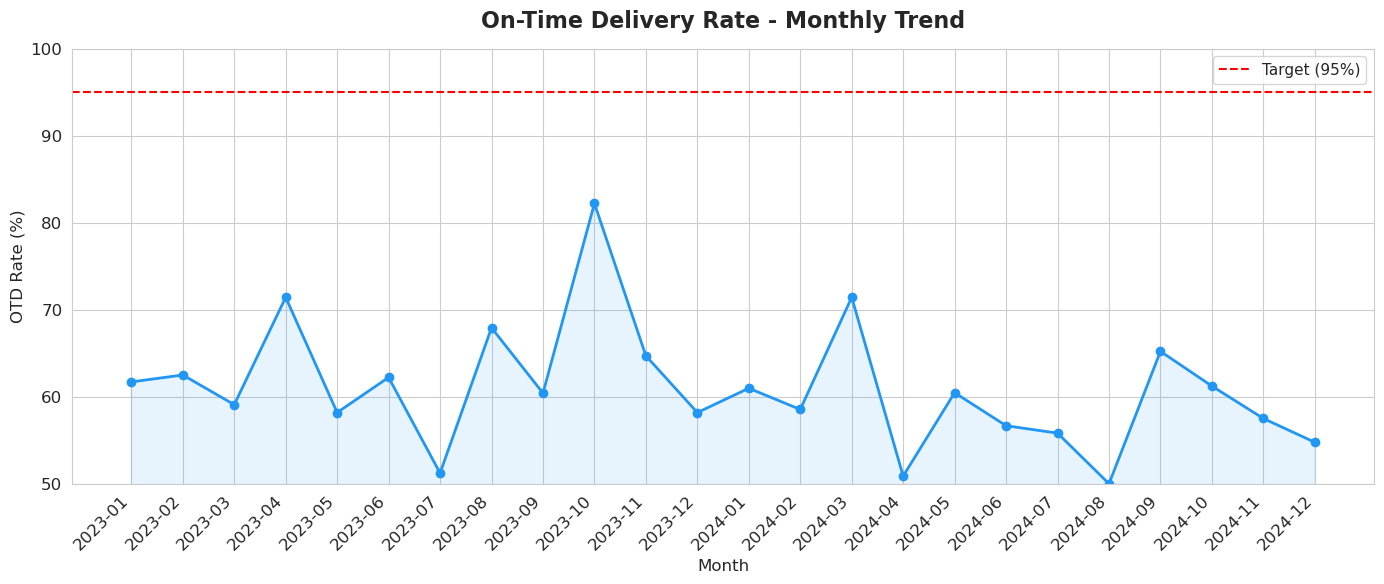

Chart saved to charts/01_otd_trend.png


In [34]:
# ============================================================
# CHART 1: ON-TIME DELIVERY RATE TREND (Monthly)
# ============================================================

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(otd_monthly['order_year_month'], otd_monthly['otd_rate'],
        marker='o', linewidth=2, color='#2196F3', markersize=6)
ax.axhline(y=95, color='red', linestyle='--', linewidth=1.5, label='Target (95%)')
ax.fill_between(range(len(otd_monthly)), otd_monthly['otd_rate'],
                alpha=0.1, color='#2196F3')

ax.set_title('On-Time Delivery Rate - Monthly Trend', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('OTD Rate (%)', fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim(50, 100)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('charts/01_otd_trend.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart saved to charts/01_otd_trend.png")

## Chart 2 - Supplier Performance Comparison

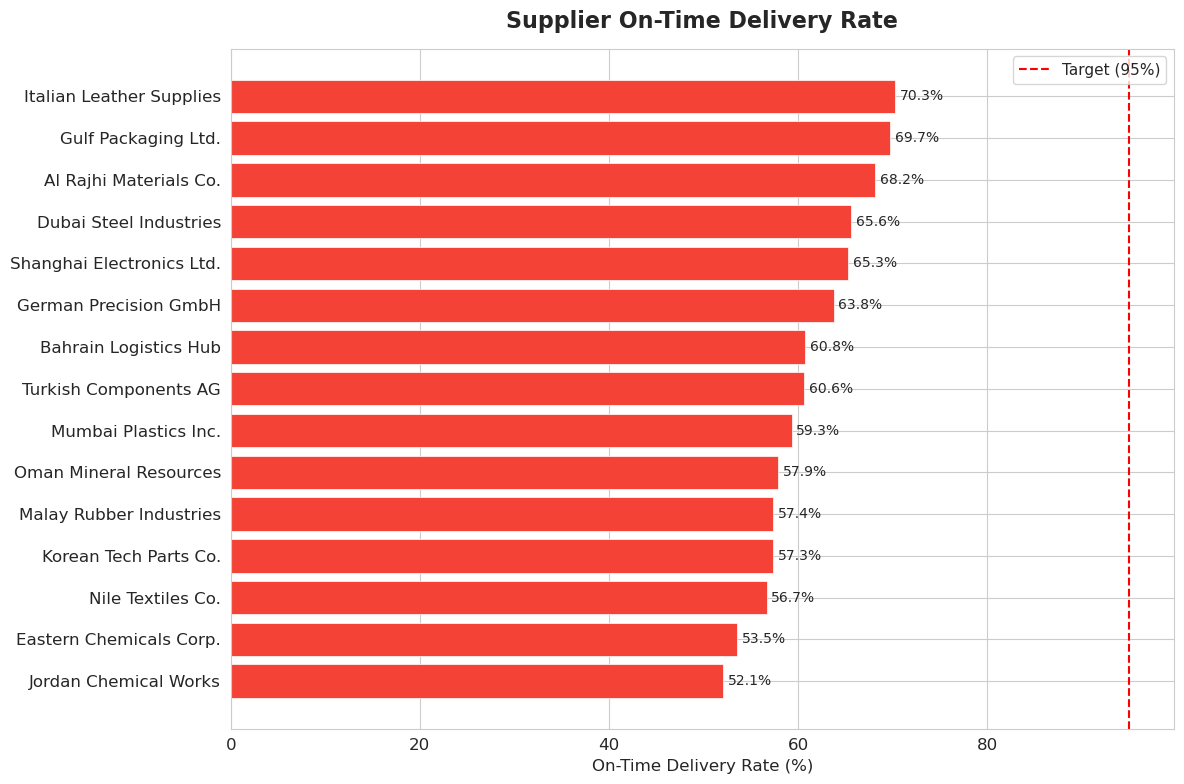

In [35]:
# ============================================================
# CHART 2: SUPPLIER ON-TIME DELIVERY COMPARISON
# ============================================================

fig, ax = plt.subplots(figsize=(12, 8))

sup_otd = supplier_analysis.sort_values('on_time_pct')
colors = ['#f44336' if x < 80 else '#ff9800' if x < 90 else '#4caf50' for x in sup_otd['on_time_pct']]

bars = ax.barh(sup_otd.index, sup_otd['on_time_pct'], color=colors, edgecolor='white', linewidth=0.5)
ax.axvline(x=95, color='red', linestyle='--', linewidth=1.5, label='Target (95%)')

# Add value labels on bars
for bar, value in zip(bars, sup_otd['on_time_pct']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{value:.1f}%', va='center', fontsize=10)

ax.set_title('Supplier On-Time Delivery Rate', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('On-Time Delivery Rate (%)', fontsize=12)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('charts/02_supplier_otd.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 3 - Order Status Distribution

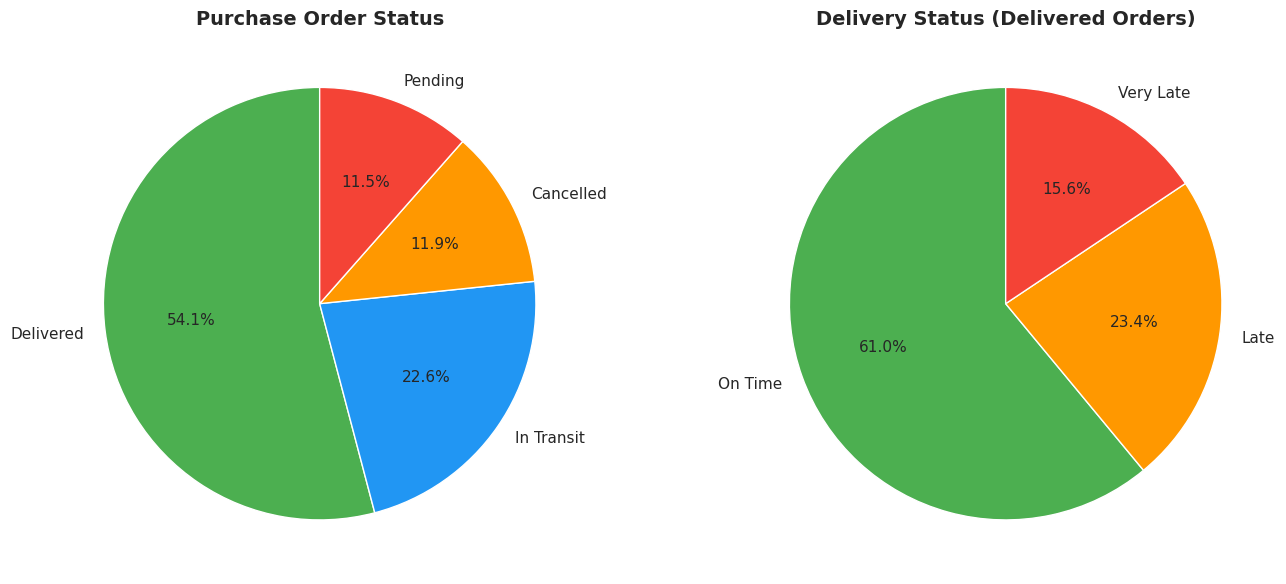

In [36]:
# ============================================================
# CHART 3: ORDER STATUS & DELIVERY STATUS PIE CHARTS
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Order Status
order_status = purchase_orders['order_status'].value_counts()
colors1 = ['#4caf50', '#2196F3', '#ff9800', '#f44336']
axes[0].pie(order_status.values, labels=order_status.index, autopct='%1.1f%%',
            colors=colors1[:len(order_status)], startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Purchase Order Status', fontsize=14, fontweight='bold')

# Delivery Status
del_status = delivered_orders['delivery_status'].value_counts()
colors2 = ['#4caf50', '#ff9800', '#f44336']
axes[1].pie(del_status.values, labels=del_status.index, autopct='%1.1f%%',
            colors=colors2[:len(del_status)], startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Delivery Status (Delivered Orders)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('charts/03_order_status.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 4 - Monthly Revenue vs Cost

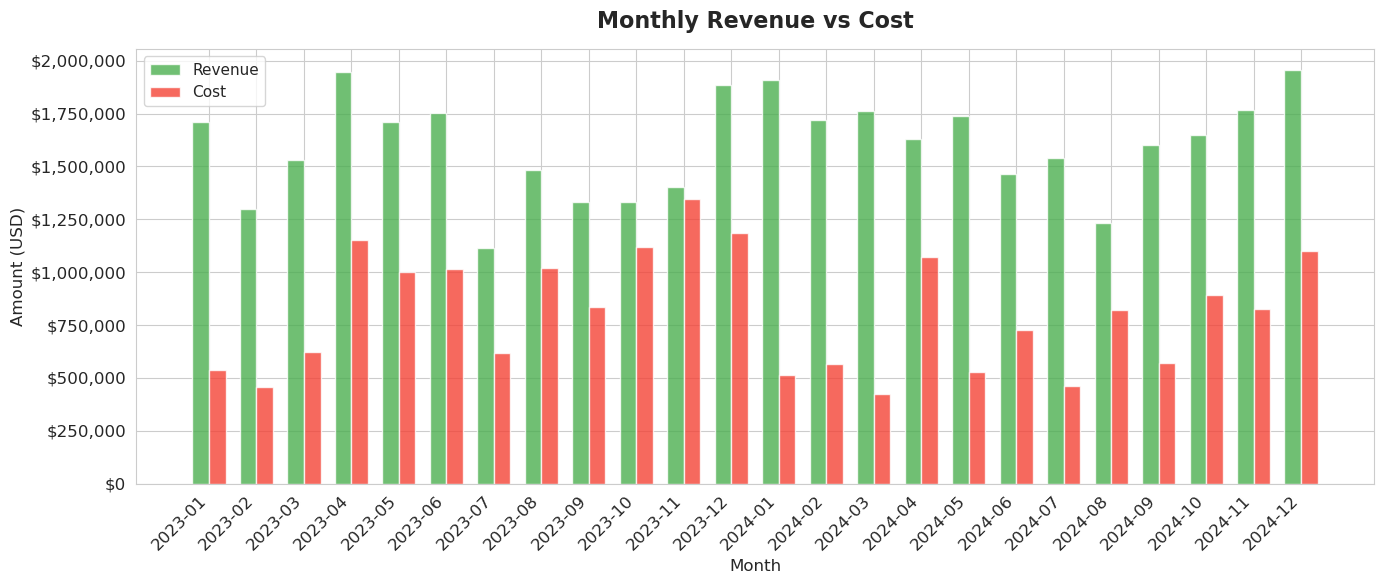

In [37]:
# ============================================================
# CHART 4: MONTHLY REVENUE vs COST
# ============================================================

monthly_revenue = customer_orders.groupby('order_year_month')['total_revenue_usd'].sum().reset_index()
monthly_cost = delivered_orders.groupby('order_year_month')['total_cost_usd'].sum().reset_index()
monthly_revenue['order_year_month'] = monthly_revenue['order_year_month'].astype(str)
monthly_cost['order_year_month'] = monthly_cost['order_year_month'].astype(str)

fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(monthly_revenue))
width = 0.35
ax.bar([i - width/2 for i in x], monthly_revenue['total_revenue_usd'], width,
       label='Revenue', color='#4caf50', alpha=0.8)
ax.bar([i + width/2 for i in x], monthly_cost['total_cost_usd'][:len(monthly_revenue)], width,
       label='Cost', color='#f44336', alpha=0.8)

ax.set_title('Monthly Revenue vs Cost', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Amount (USD)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(monthly_revenue['order_year_month'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.savefig('charts/04_revenue_vs_cost.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 5 - Warehouse Utilization

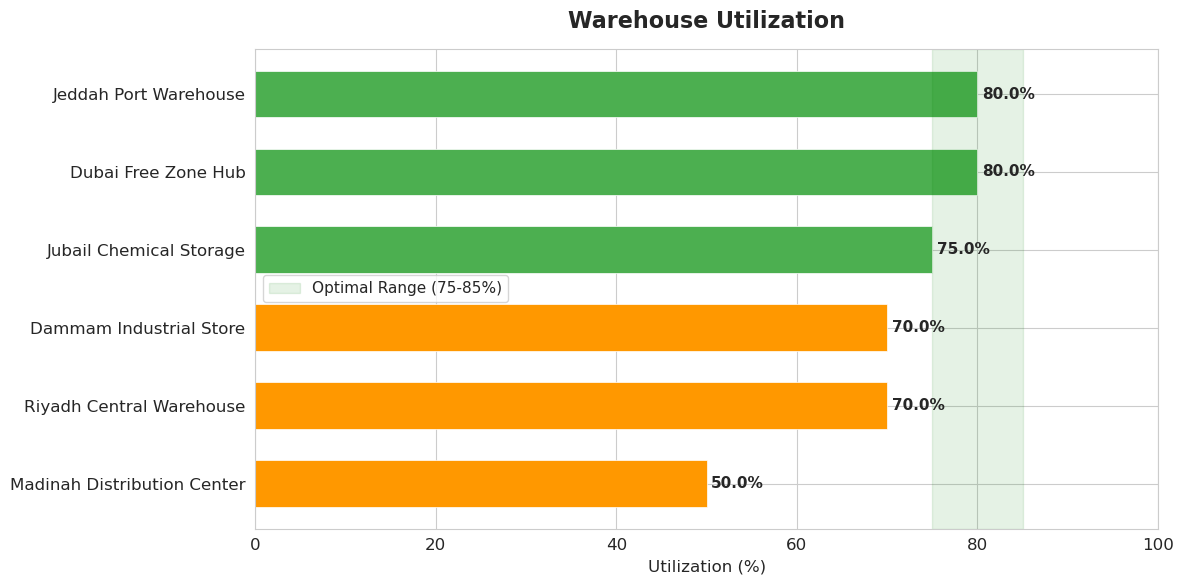

In [38]:
# ============================================================
# CHART 5: WAREHOUSE UTILIZATION
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))

wh_data = warehouses.sort_values('utilization_pct', ascending=True)
colors = ['#4caf50' if 75 <= x <= 85 else '#ff9800' if x < 75 else '#f44336'
          for x in wh_data['utilization_pct']]

bars = ax.barh(wh_data['warehouse_name'], wh_data['utilization_pct'], color=colors,
               edgecolor='white', linewidth=0.5, height=0.6)

# Add optimal zone
ax.axvspan(75, 85, alpha=0.1, color='green', label='Optimal Range (75-85%)')

# Add value labels
for bar, value in zip(bars, wh_data['utilization_pct']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{value:.1f}%', va='center', fontsize=11, fontweight='bold')

ax.set_title('Warehouse Utilization', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Utilization (%)', fontsize=12)
ax.set_xlim(0, 100)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('charts/05_warehouse_utilization.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 6 - Shipping Mode Cost Comparison

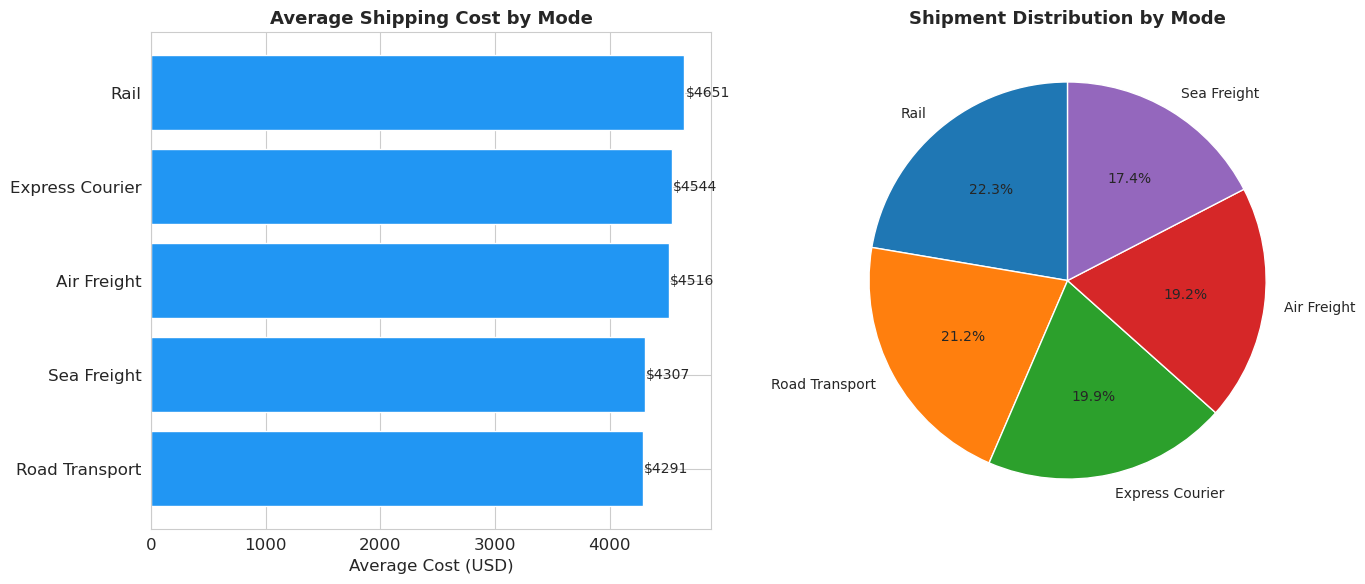

In [39]:
# ============================================================
# CHART 6: SHIPPING MODE ANALYSIS
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average cost by shipping mode
mode_data = shipments.groupby('shipping_mode')['shipping_cost_usd'].mean().sort_values()
axes[0].barh(mode_data.index, mode_data.values, color='#2196F3', edgecolor='white')
axes[0].set_title('Average Shipping Cost by Mode', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Average Cost (USD)')
for i, v in enumerate(mode_data.values):
    axes[0].text(v + 10, i, f'${v:.0f}', va='center', fontsize=10)

# Shipment count by mode
mode_count = shipments['shipping_mode'].value_counts()
axes[1].pie(mode_count.values, labels=mode_count.index, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Shipment Distribution by Mode', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('charts/06_shipping_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 7 - Customer Satisfaction Heatmap

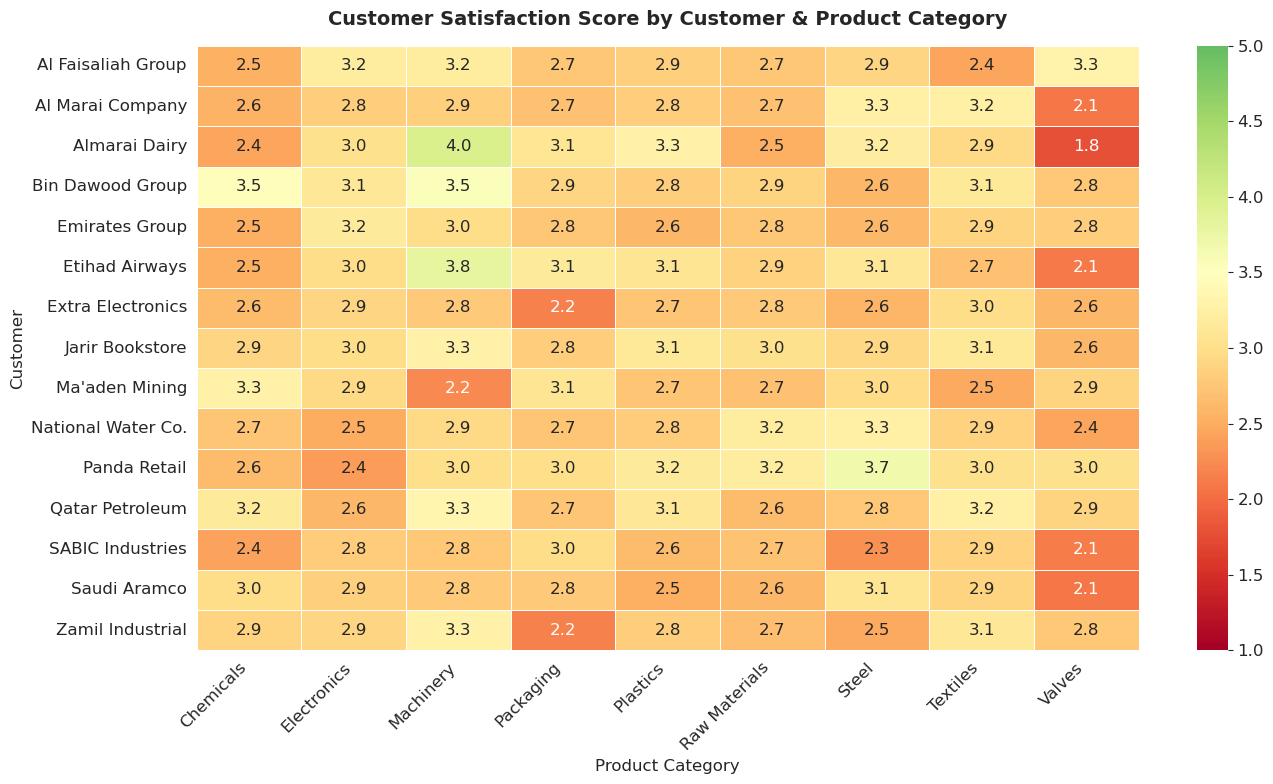

In [40]:
# ============================================================
# CHART 7: CUSTOMER SATISFACTION HEATMAP BY CUSTOMER & PRODUCT
# ============================================================

# Create pivot table: customer vs product category satisfaction
csat_pivot = customer_orders.pivot_table(
    values='satisfaction_score',
    index='customer_name',
    columns='product_category',
    aggfunc='mean'
).round(2)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(csat_pivot, annot=True, fmt='.1f', cmap='RdYlGn',
            center=3.5, linewidths=0.5, ax=ax, vmin=1, vmax=5)
ax.set_title('Customer Satisfaction Score by Customer & Product Category',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Customer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('charts/07_csat_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## Chart 8 - KPI Scorecard Visual

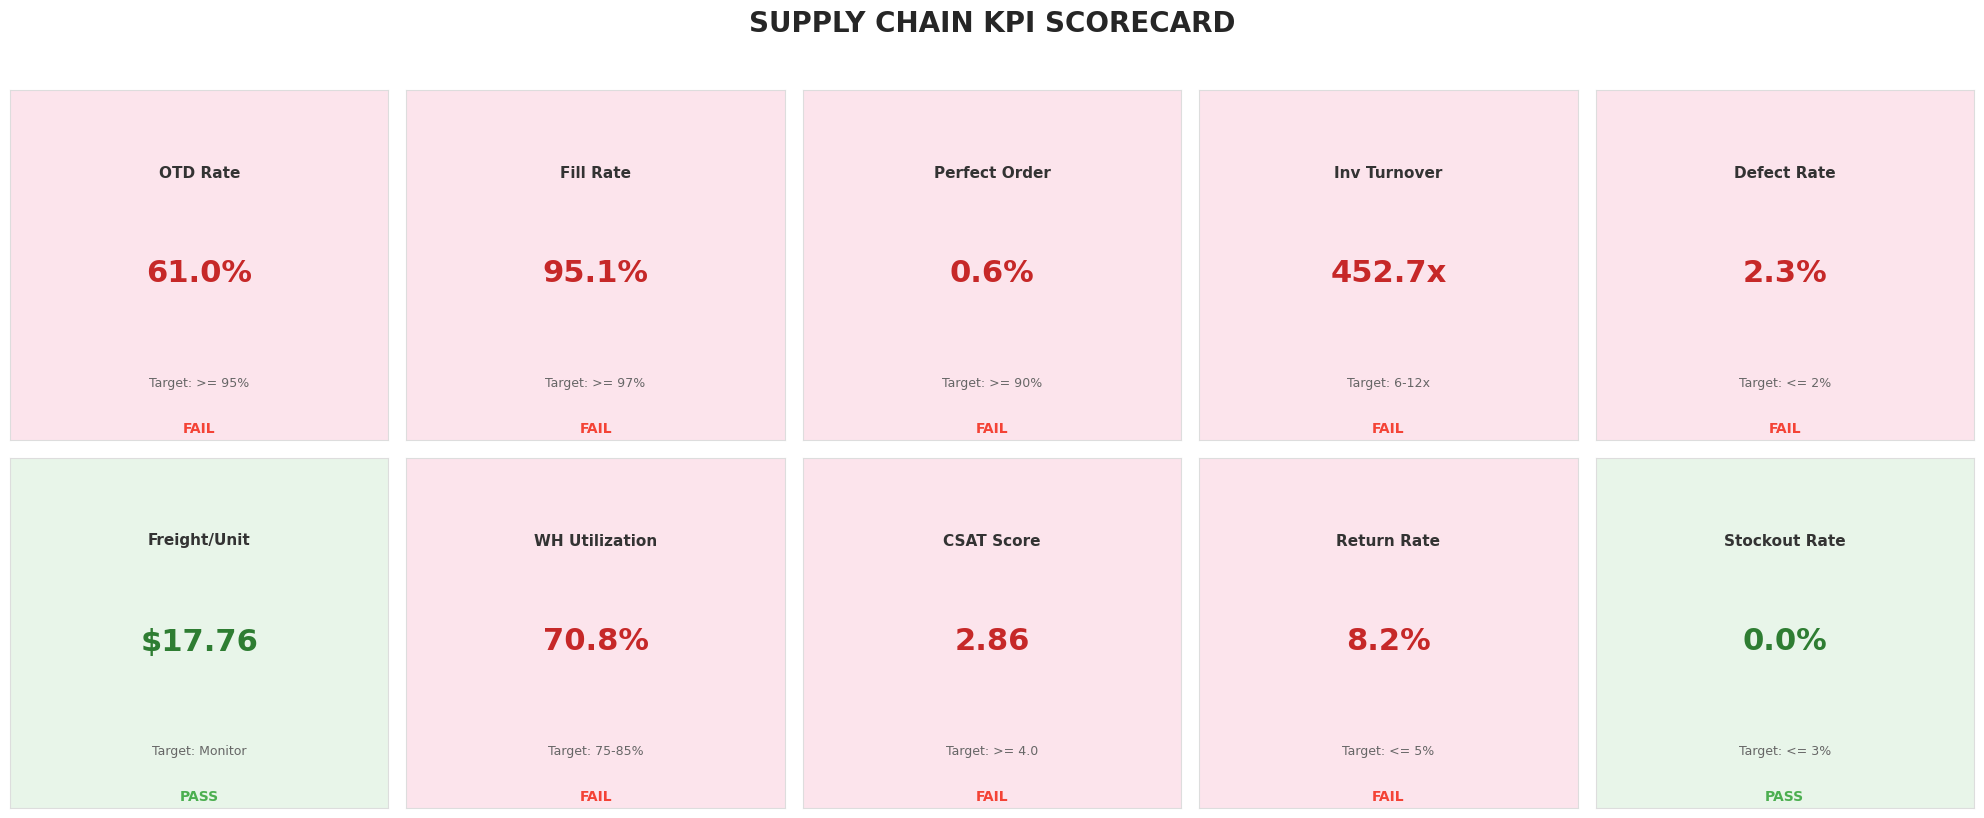

In [41]:
# ============================================================
# CHART 8: KPI SCORECARD (Summary Visual)
# ============================================================

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('SUPPLY CHAIN KPI SCORECARD', fontsize=20, fontweight='bold', y=1.02)

kpi_cards = [
    ("OTD Rate", f"{otd_rate:.1f}%", ">= 95%", otd_rate >= 95),
    ("Fill Rate", f"{fill_rate:.1f}%", ">= 97%", fill_rate >= 97),
    ("Perfect Order", f"{perfect_order_rate:.1f}%", ">= 90%", perfect_order_rate >= 90),
    ("Inv Turnover", f"{inventory_turnover:.1f}x", "6-12x", 6 <= inventory_turnover <= 12),
    ("Defect Rate", f"{defect_rate:.1f}%", "<= 2%", defect_rate <= 2),
    ("Freight/Unit", f"${freight_per_unit:.2f}", "Monitor", True),
    ("WH Utilization", f"{avg_util:.1f}%", "75-85%", 75 <= avg_util <= 85),
    ("CSAT Score", f"{avg_csat:.2f}", ">= 4.0", avg_csat >= 4),
    ("Return Rate", f"{return_rate:.1f}%", "<= 5%", return_rate <= 5),
    ("Stockout Rate", f"{stockout_rate:.1f}%", "<= 3%", stockout_rate <= 3),
]

for idx, (name, value, target, meets) in enumerate(kpi_cards):
    row = idx // 5
    col = idx % 5
    ax = axes[row][col]
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    bg_color = '#e8f5e9' if meets else '#fce4ec'
    ax.set_facecolor(bg_color)

    ax.text(0.5, 0.75, name, fontsize=11, ha='center', fontweight='bold', color='#333')
    ax.text(0.5, 0.45, value, fontsize=22, ha='center', fontweight='bold',
            color='#2e7d32' if meets else '#c62828')
    ax.text(0.5, 0.15, f'Target: {target}', fontsize=9, ha='center', color='#666')

    status = "PASS" if meets else "FAIL"
    status_color = '#4caf50' if meets else '#f44336'
    ax.text(0.5, 0.02, status, fontsize=10, ha='center', fontweight='bold', color=status_color)

    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_color('#ddd')

plt.tight_layout()
plt.savefig('charts/08_kpi_scorecard.png', dpi=150, bbox_inches='tight')
plt.show()

# SQL ANALYSIS 

In [42]:
# ============================================================
# SQL ANALYSIS using SQLite (built into Python)
# ============================================================
import sqlite3
#create a database in memory
conn= sqlite3.connect('supply_chain.db')
# cleaning tables
def clean_for_sql(df):
    for col in df.columns:
        if str(df[col].dtype).startswith('period'):
            df[col] = df[col].astype(str)
    return df
purchase_orders = clean_for_sql(purchase_orders)
customer_orders = clean_for_sql(customer_orders)
# Load all dataframes into SQL tables
purchase_orders.to_sql('purchase_orders', conn, if_exists='replace', index=False)
customer_orders.to_sql('customer_orders', conn, if_exists='replace', index=False)
suppliers.to_sql('suppliers', conn, if_exists='replace', index=False)
products.to_sql('products', conn, if_exists='replace', index=False)
warehouses.to_sql('warehouses', conn, if_exists='replace', index=False)
shipments.to_sql('shipments', conn, if_exists='replace', index=False)
inventory.to_sql('inventory', conn, if_exists='replace', index=False)
transport.to_sql('transportation', conn, if_exists='replace', index=False)

print("SQL database created with all tables!")

SQL database created with all tables!


## QUERY 1: Top Suppliers by Spend

In [43]:
# SQL QUERY 1: Top 10 Suppliers by Total Spend
query1= """
select
    supplier_name,
    COUNT(*) as total_orders,
    SUM(total_cost_usd) as total_spend,
    AVG(quality_score) as avg_quality,
    ROUND(AVG(CASE WHEN delivery_status = "On Time" THEN 1.0 ELSE 0.0 END) *100, 1) as otd_rate FROM purchase_orders
WHERE order_status = "Delivered"
GROUP BY supplier_name
ORDER BY total_spend DESC
LIMIT 10
"""
result1 = pd.read_sql(query1, conn)
print("SQL Query 1: Top 10 Suppliers by Spend")
print("=" * 70)
print(result1.to_string(index=False))

SQL Query 1: Top 10 Suppliers by Spend
            supplier_name  total_orders  total_spend  avg_quality  otd_rate
    German Precision GmbH            80   6849875.45         3.98     63.70
   Oman Mineral Resources            76   2965914.46         4.14     57.90
 Italian Leather Supplies            74   1730978.79         3.89     70.30
   Dubai Steel Industries            64   1410922.35         3.98     65.60
   Al Rajhi Materials Co.            66   1057870.15         4.08     68.20
  Eastern Chemicals Corp.            99   1032734.21         3.96     53.50
Shanghai Electronics Ltd.            72    948499.92         3.96     65.30
    Korean Tech Parts Co.            82    925503.07         4.03     57.30
        Nile Textiles Co.            60    734428.53         4.00     56.70
    Jordan Chemical Works            71    432422.70         4.03     52.10


## Query 2 - Monthly KPI Summary

In [44]:
# SQL QUERY 2: Monthly KPI Summary
query2 = """
SELECT
    order_year,
    order_month,
    COUNT(*) as total_orders,
    ROUND(SUM(total_cost_usd), 2) as total_spend,
    ROUND(AVG(CASE WHEN delivery_status = 'On Time' THEN 1.0 ELSE 0.0 END) * 100, 1) as otd_rate,
    ROUND(AVG(quality_score), 2) as avg_quality,
    SUM(defect_quantity) as total_defects
FROM purchase_orders
WHERE order_status = 'Delivered'
GROUP BY order_year, order_month
ORDER BY order_year, order_month
"""
result2 = pd.read_sql(query2, conn)
print("SQL Query 2: Monthly Performance Summary")
print("=" * 80)
print(result2.to_string(index=False))

SQL Query 2: Monthly Performance Summary
 order_year  order_month  total_orders  total_spend  otd_rate  avg_quality  total_defects
       2023            1            47    535235.80     61.70         3.97            269
       2023            2            40    456199.11     62.50         3.91            359
       2023            3            44    622809.17     59.10         4.03            472
       2023            4            42   1154055.29     71.40         4.03            315
       2023            5            55   1002774.97     58.20         3.95            558
       2023            6            45   1014634.56     62.20         4.10            298
       2023            7            41    617303.36     51.20         3.98            268
       2023            8            53   1020221.09     67.90         4.06            472
       2023            9            48    834800.05     60.40         3.94            341
       2023           10            45   1117755.35     82.

## Query 3 - Customer Revenue Analysis

In [45]:
# SQL QUERY 3: Customer Revenue Analysis
query3 = """
SELECT
    customer_name,
    customer_city,
    COUNT(*) AS total_orders,
    ROUND(SUM(total_revenue_usd),2) AS total_revenue,
    ROUND(AVG(satisfaction_score),2) AS avg_csat,
    ROUND(AVG(return_flag)*100,1) AS return_rate_pct,
    ROUND(AVG(days_to_fulfill),1) AS avg_days_to_fulfill
FROM customer_orders
GROUP BY customer_name, customer_city
ORDER BY total_revenue DESC
"""
result3= pd.read_sql(query3,conn)
print("SQL Query 3: Customer Revenue Analysis")
print("=" * 90)
print(result3.to_string(index=False))

SQL Query 3: Customer Revenue Analysis
     customer_name customer_city  total_orders  total_revenue  avg_csat  return_rate_pct  avg_days_to_fulfill
  Zamil Industrial        Dammam           178     2997429.81      2.80             5.60                 9.80
    Emirates Group         Dubai           167     2900529.49      2.79             9.00                 9.80
National Water Co.        Riyadh           180     2858637.70      2.84             9.40                 9.40
      Saudi Aramco       Dhahran           170     2839684.13      2.78             7.10                10.10
   Qatar Petroleum          Doha           162     2838736.32      2.93             9.90                 9.20
    Ma'aden Mining        Riyadh           152     2759622.61      2.82             6.60                 9.70
  Bin Dawood Group         Mecca           176     2666563.24      3.01             6.80                 9.30
   Jarir Bookstore        Riyadh           192     2527941.30      3.00          

## Query 4 - Late Delivery Root Cause

In [46]:
# SQL QUERY 4: Late Delivery Root Cause Analysis
query4 = """
SELECT
   supplier_name,
   shipping_mode,
   COUNT(*) AS late_delivery,
   ROUND(AVG(days_late),1) AS avg_days_late,
   ROUND(SUM(total_cost_usd),2) AS affected_spend
FROM purchase_orders
WHERE delivery_status IN ('Late', 'Very Late')
GROUP BY supplier_name, shipping_mode
Having COUNT(*) >= 3
ORDER BY late_delivery DESC
LIMIT 15
"""
result4 = pd.read_sql(query4, conn)
print("SQL Query 4: Late Delivery Root Causes")
print("=" * 80)
print(result4.to_string(index=False))

SQL Query 4: Late Delivery Root Causes
            supplier_name   shipping_mode  late_delivery  avg_days_late  affected_spend
    Jordan Chemical Works     Sea Freight             12           7.40        77391.32
  Eastern Chemicals Corp. Express Courier             10           6.00        99189.34
  Eastern Chemicals Corp.  Road Transport             10           7.80        94293.12
    Korean Tech Parts Co.     Sea Freight             10           4.40       126159.56
   Oman Mineral Resources  Road Transport             10           7.40       396603.64
    Bahrain Logistics Hub     Air Freight              9           5.00        30343.60
  Eastern Chemicals Corp.     Air Freight              9           7.90        84663.20
  Eastern Chemicals Corp.            Rail              9           3.80       107799.41
    German Precision GmbH Express Courier              9           6.90       826299.57
    Korean Tech Parts Co. Express Courier              9           5.60        75

## Query 5 - Product Performance

In [47]:
# SQL QUERY 5: Product Performance Summary
query5 = """
SELECT
    p.product_name,
    p.category,
    COUNT(po.order_id) as times_ordered,
    ROUND(SUM(po.total_cost_usd), 2) as total_cost,
    ROUND(AVG(po.quality_score), 2) as avg_quality,
    SUM(po.defect_quantity) as total_defects,
    ROUND(SUM(po.defect_quantity) * 100.0 / SUM(po.quantity_received), 2) as defect_rate
FROM purchase_orders po
JOIN products p ON po.product_id = p.product_id
WHERE po.order_status = 'Delivered'
GROUP BY p.product_name, p.category
ORDER BY total_cost DESC
"""
result5 = pd.read_sql(query5, conn)
print("SQL Query 5: Product Performance")
print("=" * 100)
print(result5.to_string(index=False))

SQL Query 5: Product Performance
            product_name      category  times_ordered  total_cost  avg_quality  total_defects  defect_rate
Precision Gear Set PG-10     Machinery             80  6849875.45         3.98            693         2.28
  Copper Wire Spool 500m Raw Materials             76  2965914.46         4.14            676         2.35
   Premium Leather Sheet      Textiles             74  1730978.79         3.89            563         2.29
  Industrial Valve A-100        Valves             66  1057870.15         4.08            421         1.97
   Sodium Hydroxide 25kg     Chemicals             99  1032734.21         3.96            861         2.52
      LED Display Module   Electronics             72   948499.92         3.96            690         2.50
    Sensor Module SM-300   Electronics             42   834387.02         4.04            371         2.04
         Steel Beam H200         Steel             20   826162.00         4.10            124         1.96
  Co

## Close Database

In [48]:
conn.close()
print("SQL database connection closed.")

SQL database connection closed.


# Executive Summary

In [53]:
# ============================================================
# EXECUTIVE SUMMARY
# ============================================================
top1 = reasons.index[0] if len(reasons) > 0 else "N/A"
top2 = reasons.index[1] if len(reasons) > 1 else "N/A"
print("""
╔══════════════════════════════════════════════════════════════════════╗
║          SUPPLY CHAIN KPI TRACKER - EXECUTIVE SUMMARY              ║
║          Analysis Period: January 2023 - December 2024             ║
║          Prepared by: Heba Elgamal                                 ║
╚══════════════════════════════════════════════════════════════════════╝

OVERVIEW:
---------
This analysis covers 2 years of supply chain operations including:
  - 2,000 purchase orders across 15 suppliers
  - 2,500 customer orders from 15 major clients
  - 1,500 shipments via 8 carriers across 5 shipping modes
  - 6 warehouses in Saudi Arabia & UAE

KEY FINDINGS:
-------------
1. DELIVERY PERFORMANCE
   - On-Time Delivery Rate is {otd_status} target at {otd_rate:.1f}%
   - {not_on_time:,} orders experienced delays out of {total_delivered:,} delivered
   - Main delay factors: supplier lead time variability, customs clearance
   - Delivery performance remains below acceptable service levels, with on-time delivery achieved in only 61% of 
     shipments. 
   - This indicates potential supply variability and fulfillment delays that may lead to stockouts.

2. ORDER QUALITY
   - Perfect Order Rate: {perfect_order_rate:.1f}%
   - Supplier Defect Rate: {defect_rate:.2f}%
   - {has_defects:,} orders contained defective items

3. CUSTOMER IMPACT
   - Average Customer Satisfaction: {avg_csat:.2f}/5.00
   - Return Rate: {return_rate:.1f}%
   - Top return reasons: {top1}, {top2}
   - The perfect order rate of 0.6% suggests inefficiencies across multiple fulfillment dimensions, including 
     product quality and delivery accuracy, 
     contributing to increased return rates (8.2%) and lower customer satisfaction.

4. COST EFFICIENCY
   - Average Freight Cost per Unit: ${freight_per_unit:.2f}
   - Warehouse Utilization: {avg_util:.1f}%
   - Warehouse utilization averages 70.8%, indicating available capacity that could be leveraged to improve
     inventory positioning and reduce transportation costs.

RECOMMENDATIONS:
----------------
1. Initiate performance improvement plans with the bottom 3 suppliers
   contributing to delivery delays to reduce lead time variability and
   improve on-time delivery performance.
2. Introduce inbound quality inspection checkpoints for high-defect suppliers
   to minimize defective shipments and improve the Perfect Order Rate.
3. Leverage underutilized warehouse capacity (70.8% utilization)
   to improve inventory distribution and reduce transportation lead times.
4. Evaluate opportunities for shipment consolidation across similar delivery
   routes to reduce average freight cost per unit.
5. Implement root-cause analysis on top return reasons (Damaged in Transit,
   Wrong Item) to reduce return rate and enhance customer satisfaction.
6. Establish quarterly supplier performance scorecards to monitor
   OTD, defect rate, and fulfillment accuracy.

""".format(
    otd_status="above" if otd_rate >= 95 else "below",
    otd_rate=otd_rate,
    not_on_time=not_on_time,
    total_delivered=total_delivered,
    perfect_order_rate=perfect_order_rate,
    defect_rate=defect_rate,
    has_defects=has_defects,
    avg_csat=avg_csat,
    return_rate=return_rate,
    freight_per_unit=freight_per_unit,
    avg_util=avg_util,
    top1=top1,
    top2=top2
))


╔══════════════════════════════════════════════════════════════════════╗
║          SUPPLY CHAIN KPI TRACKER - EXECUTIVE SUMMARY              ║
║          Analysis Period: January 2023 - December 2024             ║
║          Prepared by: Heba Elgamal                                 ║
╚══════════════════════════════════════════════════════════════════════╝

OVERVIEW:
---------
This analysis covers 2 years of supply chain operations including:
  - 2,000 purchase orders across 15 suppliers
  - 2,500 customer orders from 15 major clients
  - 1,500 shipments via 8 carriers across 5 shipping modes
  - 6 warehouses in Saudi Arabia & UAE

KEY FINDINGS:
-------------
1. DELIVERY PERFORMANCE
   - On-Time Delivery Rate is below target at 61.0%
   - 422 orders experienced delays out of 1,082 delivered
   - Main delay factors: supplier lead time variability, customs clearance
   - Delivery performance remains below acceptable service levels, with on-time delivery achieved in only 61% of 
     shi

# Saving Results

In [50]:
# Save all analysis results to Excel (multiple sheets)
with pd.ExcelWriter('Supply_Chain_KPI_Report.xlsx', engine='openpyxl') as writer:
    supplier_analysis.to_excel(writer, sheet_name='Supplier Performance')
    monthly_trends.to_excel(writer, sheet_name='Monthly Trends', index=False)
    ship_analysis.to_excel(writer, sheet_name='Shipping Analysis')
    customer_analysis.to_excel(writer, sheet_name='Customer Analysis')
    wh_orders.to_excel(writer, sheet_name='Warehouse Performance')
    defect_by_supplier.to_excel(writer, sheet_name='Defect Analysis', index=False)

print("Excel report saved: Supply_Chain_KPI_Report.xlsx")
print("This file has 6 sheets with all analysis results.")

Excel report saved: Supply_Chain_KPI_Report.xlsx
This file has 6 sheets with all analysis results.
